In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import copy
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Read the data
# G = nx.from_pandas_edgelist(df, 'station_origin', 'station_destination', ['distance'])
G = nx.read_graphml('london.graph')

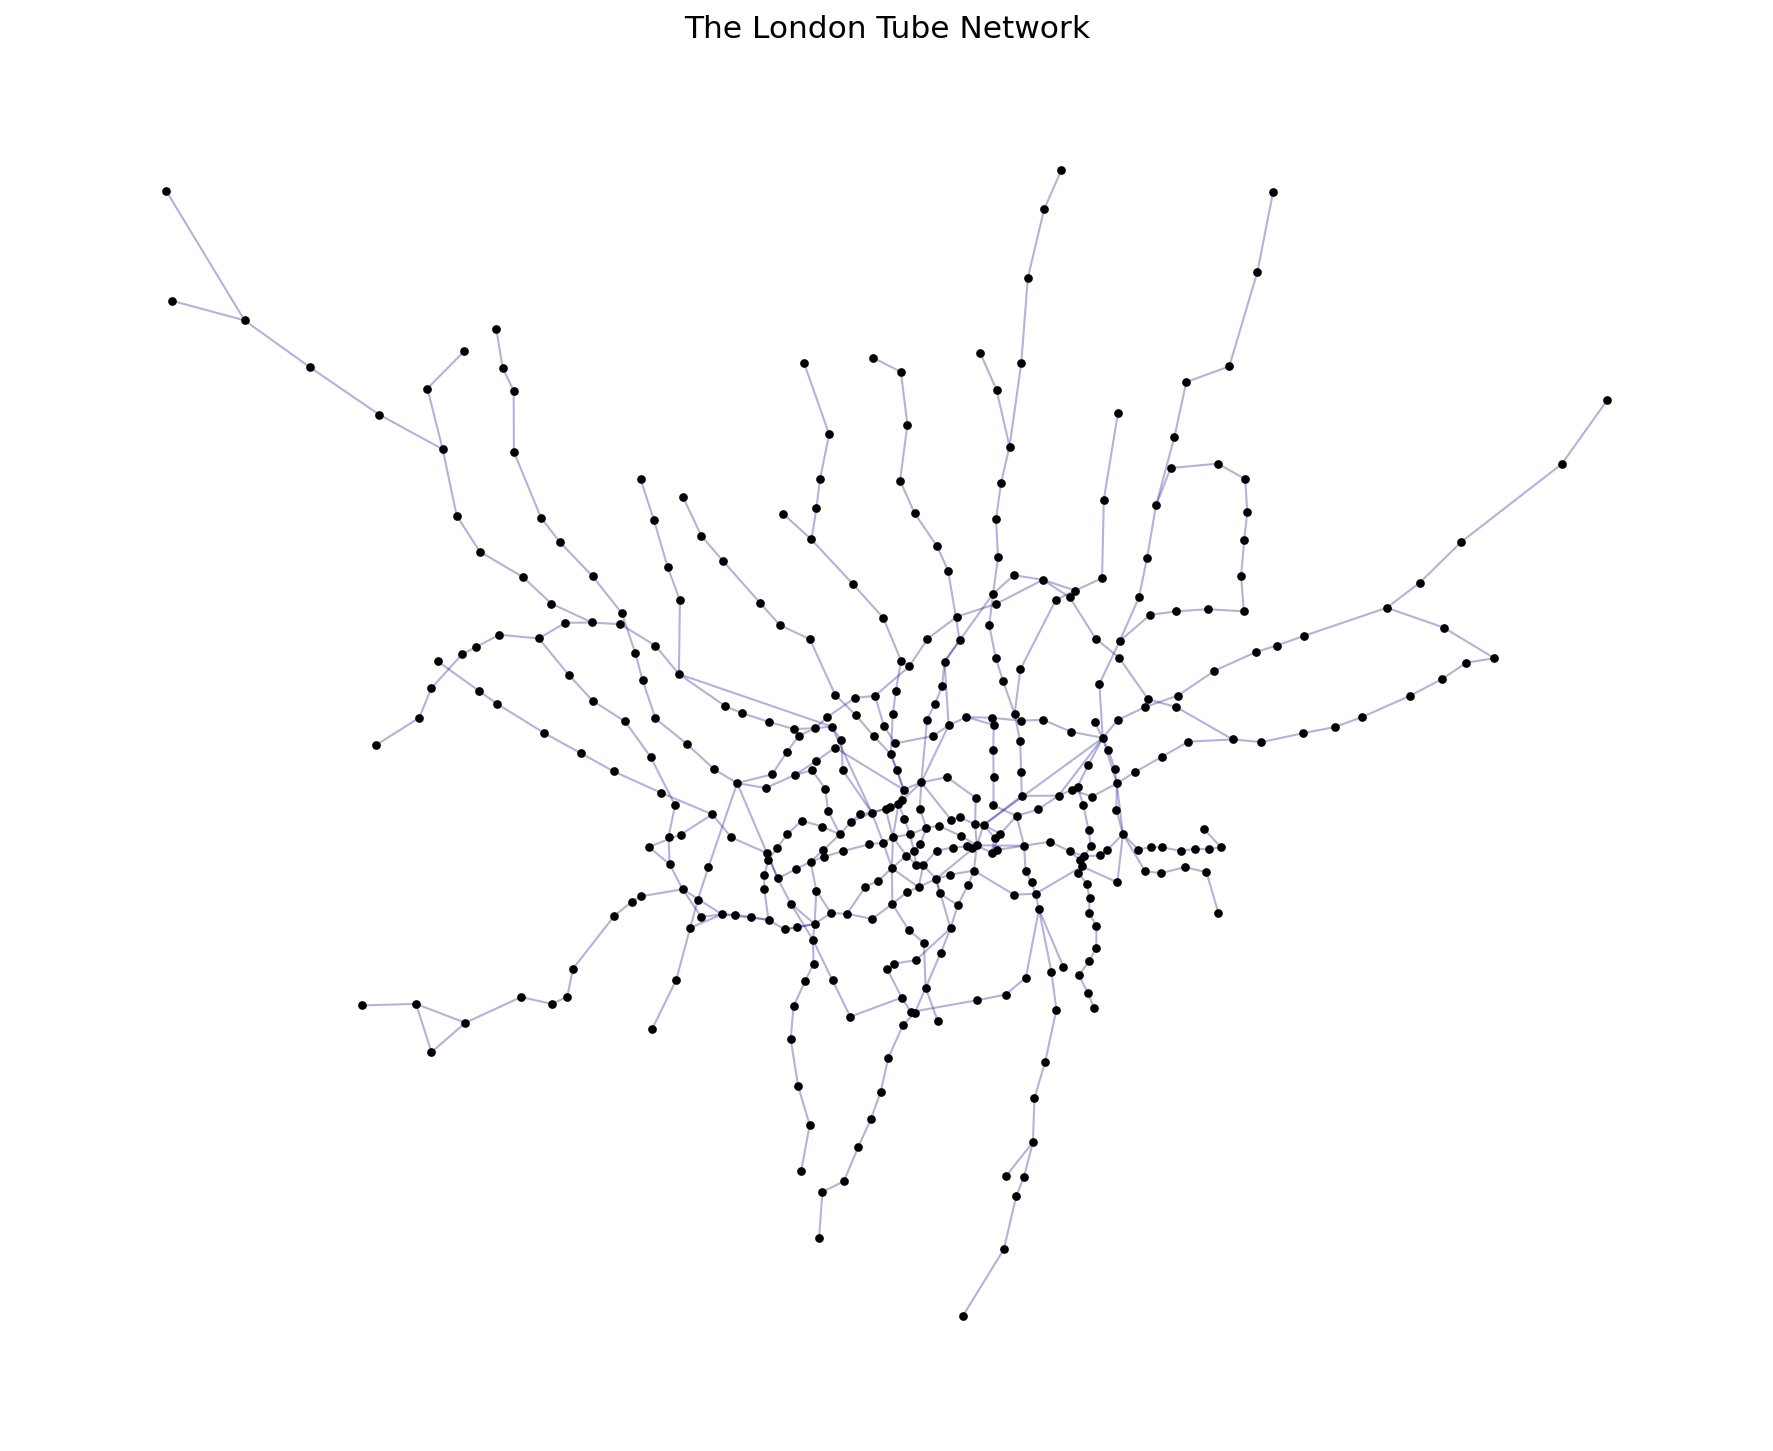

In [3]:
# Extract 'x' and 'y' values from 'coords' attribute
for node in G.nodes():
    coords = G.nodes[node]['coords'].split(',')
    G.nodes[node]['x'] = float(coords[0].strip("()"))
    G.nodes[node]['y'] = float(coords[1].strip("()"))

pos = {node: (G.nodes[node]['x'], G.nodes[node]['y']) for node in G.nodes()}
# pos = nx.spring_layout(G)
fig = plt.figure(figsize=(15, 12), dpi=150)
nx.draw_networkx_edges(G, pos, edge_color='darkblue', alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='black', alpha=1, label='Stations')

plt.axis("off")
plt.title('The London Tube Network', fontsize=15)

plt.show()

In [4]:
# calculate 3 centrality measures for each node
deg_cen = nx.degree_centrality(G.copy())
bet_cen = nx.betweenness_centrality(G.copy())
# eig_cen = nx.eigenvector_centrality(G)
clo_cen = nx.closeness_centrality(G.copy())

# convert the results to a DataFrame and sort
deg_cen_df = pd.DataFrame(list(deg_cen.items()), columns=['station', 'degree_centrality'])
deg_cen_df = deg_cen_df.sort_values('degree_centrality', ascending=False).reset_index(drop=True)

bet_cen_df = pd.DataFrame(list(bet_cen.items()), columns=['station', 'betweenness_centrality'])
bet_cen_df = bet_cen_df.sort_values('betweenness_centrality', ascending=False).reset_index(drop=True)

clo_cen_df = pd.DataFrame(list(clo_cen.items()), columns=['station', 'closeness_centrality'])
clo_cen_df = clo_cen_df.sort_values('closeness_centrality', ascending=False).reset_index(drop=True)

# # Print the top 10 nodes for each centrality measure
# print("Top 10 ranked nodes for Degree Centrality:\n", deg_cen_df.head(10))
# print("\nTop 10 ranked nodes for Betweenness Centrality:\n", bet_cen_df.head(10))
# print("\nTop 10 ranked nodes for Closeness Centrality:\n", clo_cen_df.head(10))


# Create new columns with the desired format 'station (value)'
deg_cen_df['degree_centrality_formatted'] = deg_cen_df['station'] + ' (' + deg_cen_df['degree_centrality'].round(
    4).astype(str) + ')'
bet_cen_df['betweenness_centrality_formatted'] = bet_cen_df['station'] + ' (' + bet_cen_df[
    'betweenness_centrality'].round(4).astype(str) + ')'
clo_cen_df['closeness_centrality_formatted'] = clo_cen_df['station'] + ' (' + clo_cen_df['closeness_centrality'].round(
    4).astype(str) + ')'

# Merge dataframes
merged_df = pd.concat([deg_cen_df['degree_centrality_formatted'].head(10),
                       bet_cen_df['betweenness_centrality_formatted'].head(10),
                       clo_cen_df['closeness_centrality_formatted'].head(10)], axis=1)

# Rename columns
merged_df.columns = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']

# Set the index to start from 1
merged_df.index = merged_df.index + 1

# # Generate markdown output
# Display the merged dataframe
merged_df

,Degree Centrality,Betweenness Centrality,Closeness Centrality
1,Stratford (0.0225),Stratford (0.2978),Green Park (0.1148)
2,Bank and Monument (0.02),Bank and Monument (0.2905),Bank and Monument (0.1136)
3,King's Cross St. Pancras (0.0175),Liverpool Street (0.2708),King's Cross St. Pancras (0.1134)
4,Baker Street (0.0175),King's Cross St. Pancras (0.2553),Westminster (0.1125)
5,Earl's Court (0.015),Waterloo (0.2439),Waterloo (0.1123)
6,Oxford Circus (0.015),Green Park (0.2158),Oxford Circus (0.1112)
7,Liverpool Street (0.015),Euston (0.2083),Bond Street (0.111)
8,Waterloo (0.015),Westminster (0.2033),Farringdon (0.1107)
9,Green Park (0.015),Baker Street (0.1916),Angel (0.1107)
10,Canning Town (0.015),Finchley Road (0.1651),Moorgate (0.1103)


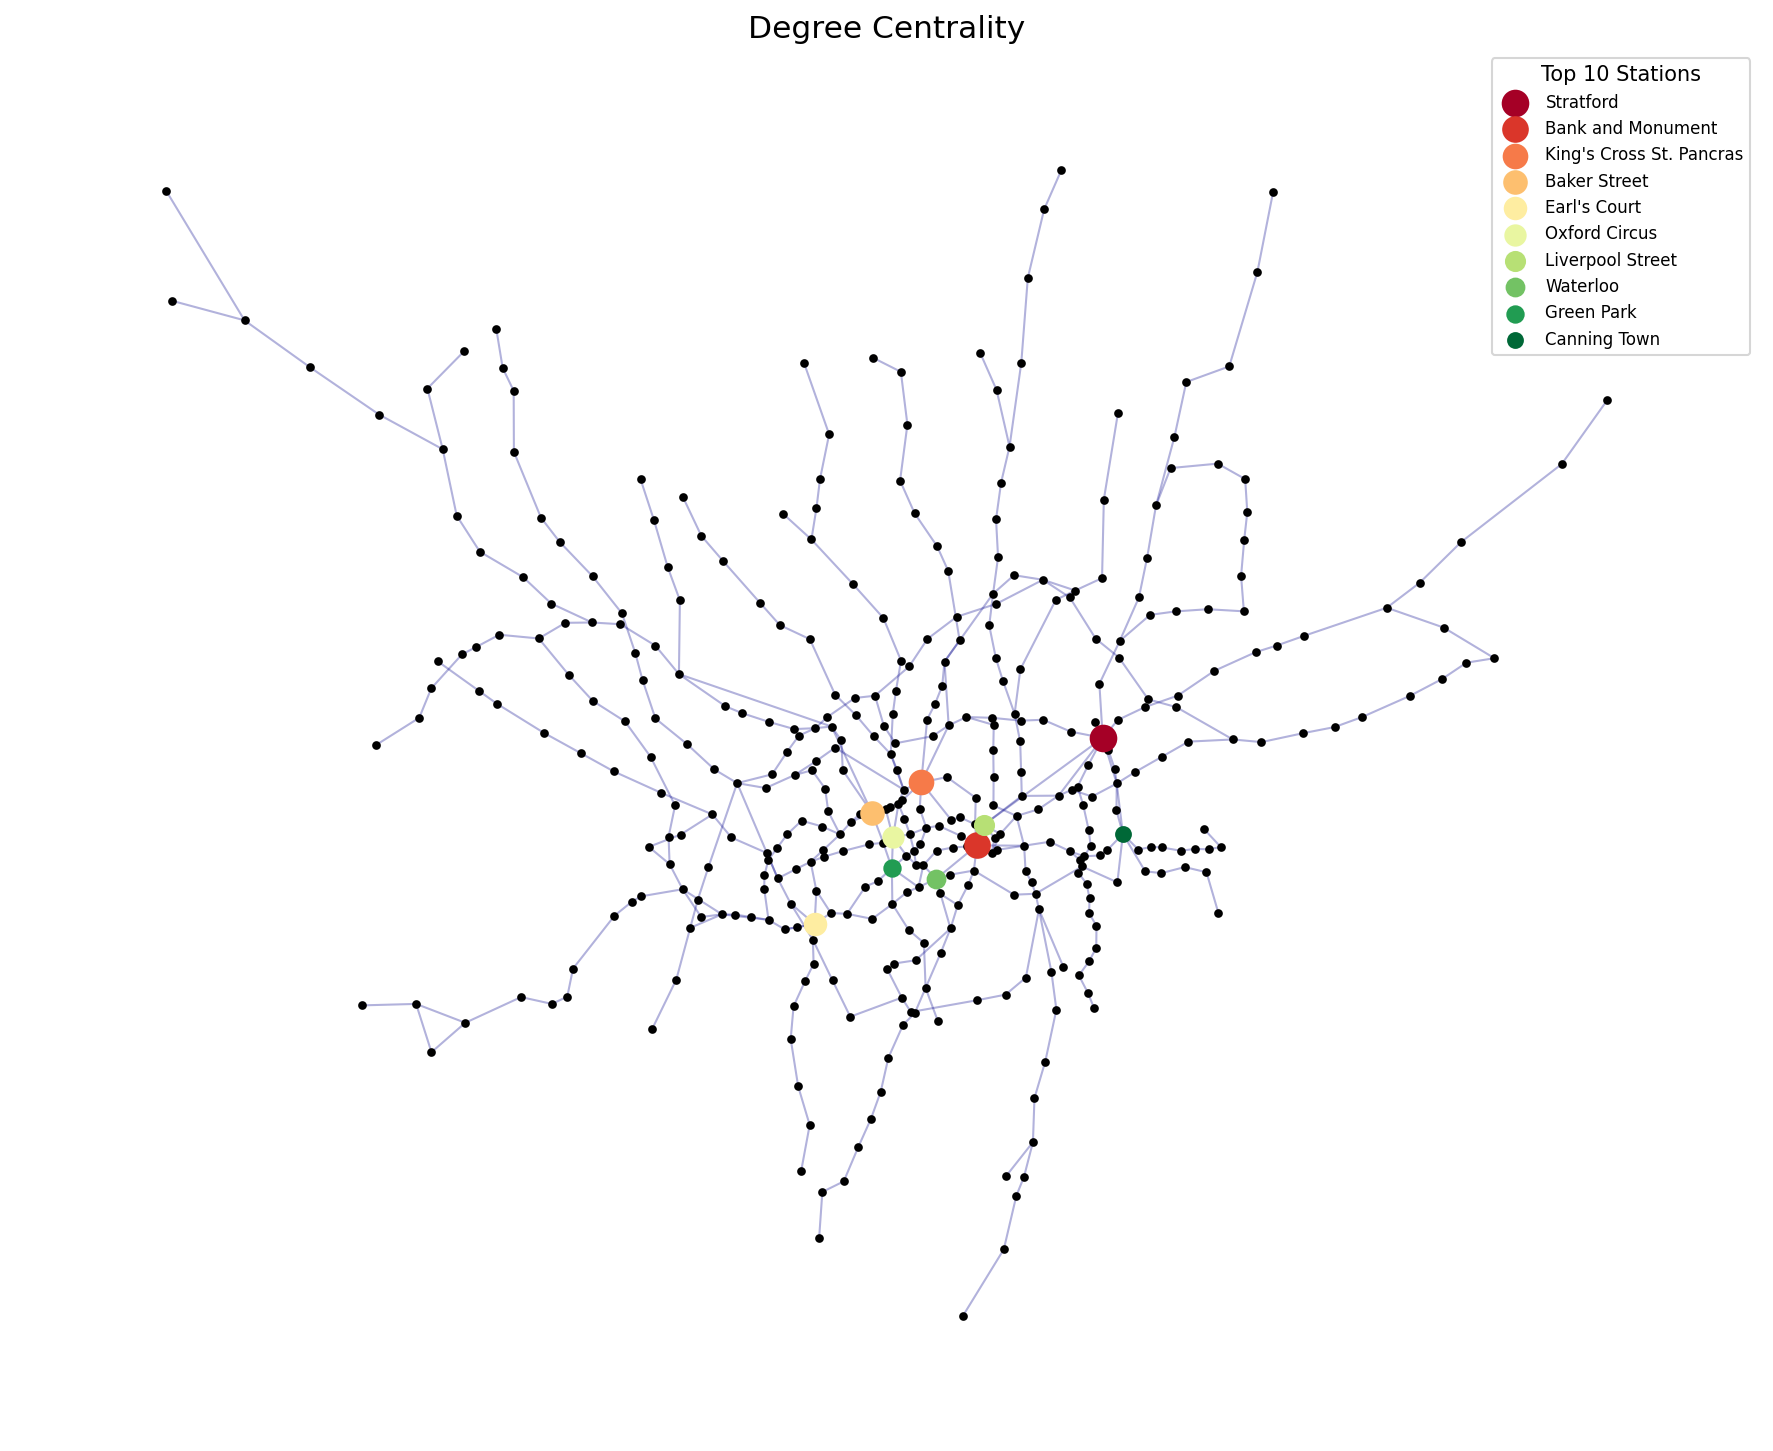

In [5]:
# 设置颜色映射和大小映射
colors = np.linspace(0, 1, 10)  # 为前10个节点创建一个从0到1的颜色映射
size_map = np.linspace(150, 50, 10)  # 为前10个节点创建一个从大到小的大小映射
color_map = [mcolors.to_hex(plt.cm.RdYlGn(color)) for color in colors]  # 使用红绿色彩映射

# 创建图形
fig, ax = plt.subplots(figsize=(15, 12), dpi=150)

# 绘制伦敦地铁网络作为背景
nx.draw_networkx_edges(G, pos, edge_color='darkblue', alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='black', alpha=1)  # 将其他车站设为淡绿色

# 绘制前10个中心性最高的站点
top_10_stations = deg_cen_df.head(10)['station']
for i, station in enumerate(top_10_stations):
    x, y = G.nodes[station]['x'], G.nodes[station]['y']
    # 绘制每个站点，并为每个站点设置一个图例项
    ax.scatter(x, y, color=color_map[i], s=size_map[i], label=station, zorder=3)

# 添加图例和标题
plt.title('Degree Centrality', fontsize=15)
# 使用图例来显示每个站点的名称和颜色
plt.legend(loc='upper right', title='Top 10 Stations', fontsize=8, markerscale=1)
plt.axis('off')
plt.show()

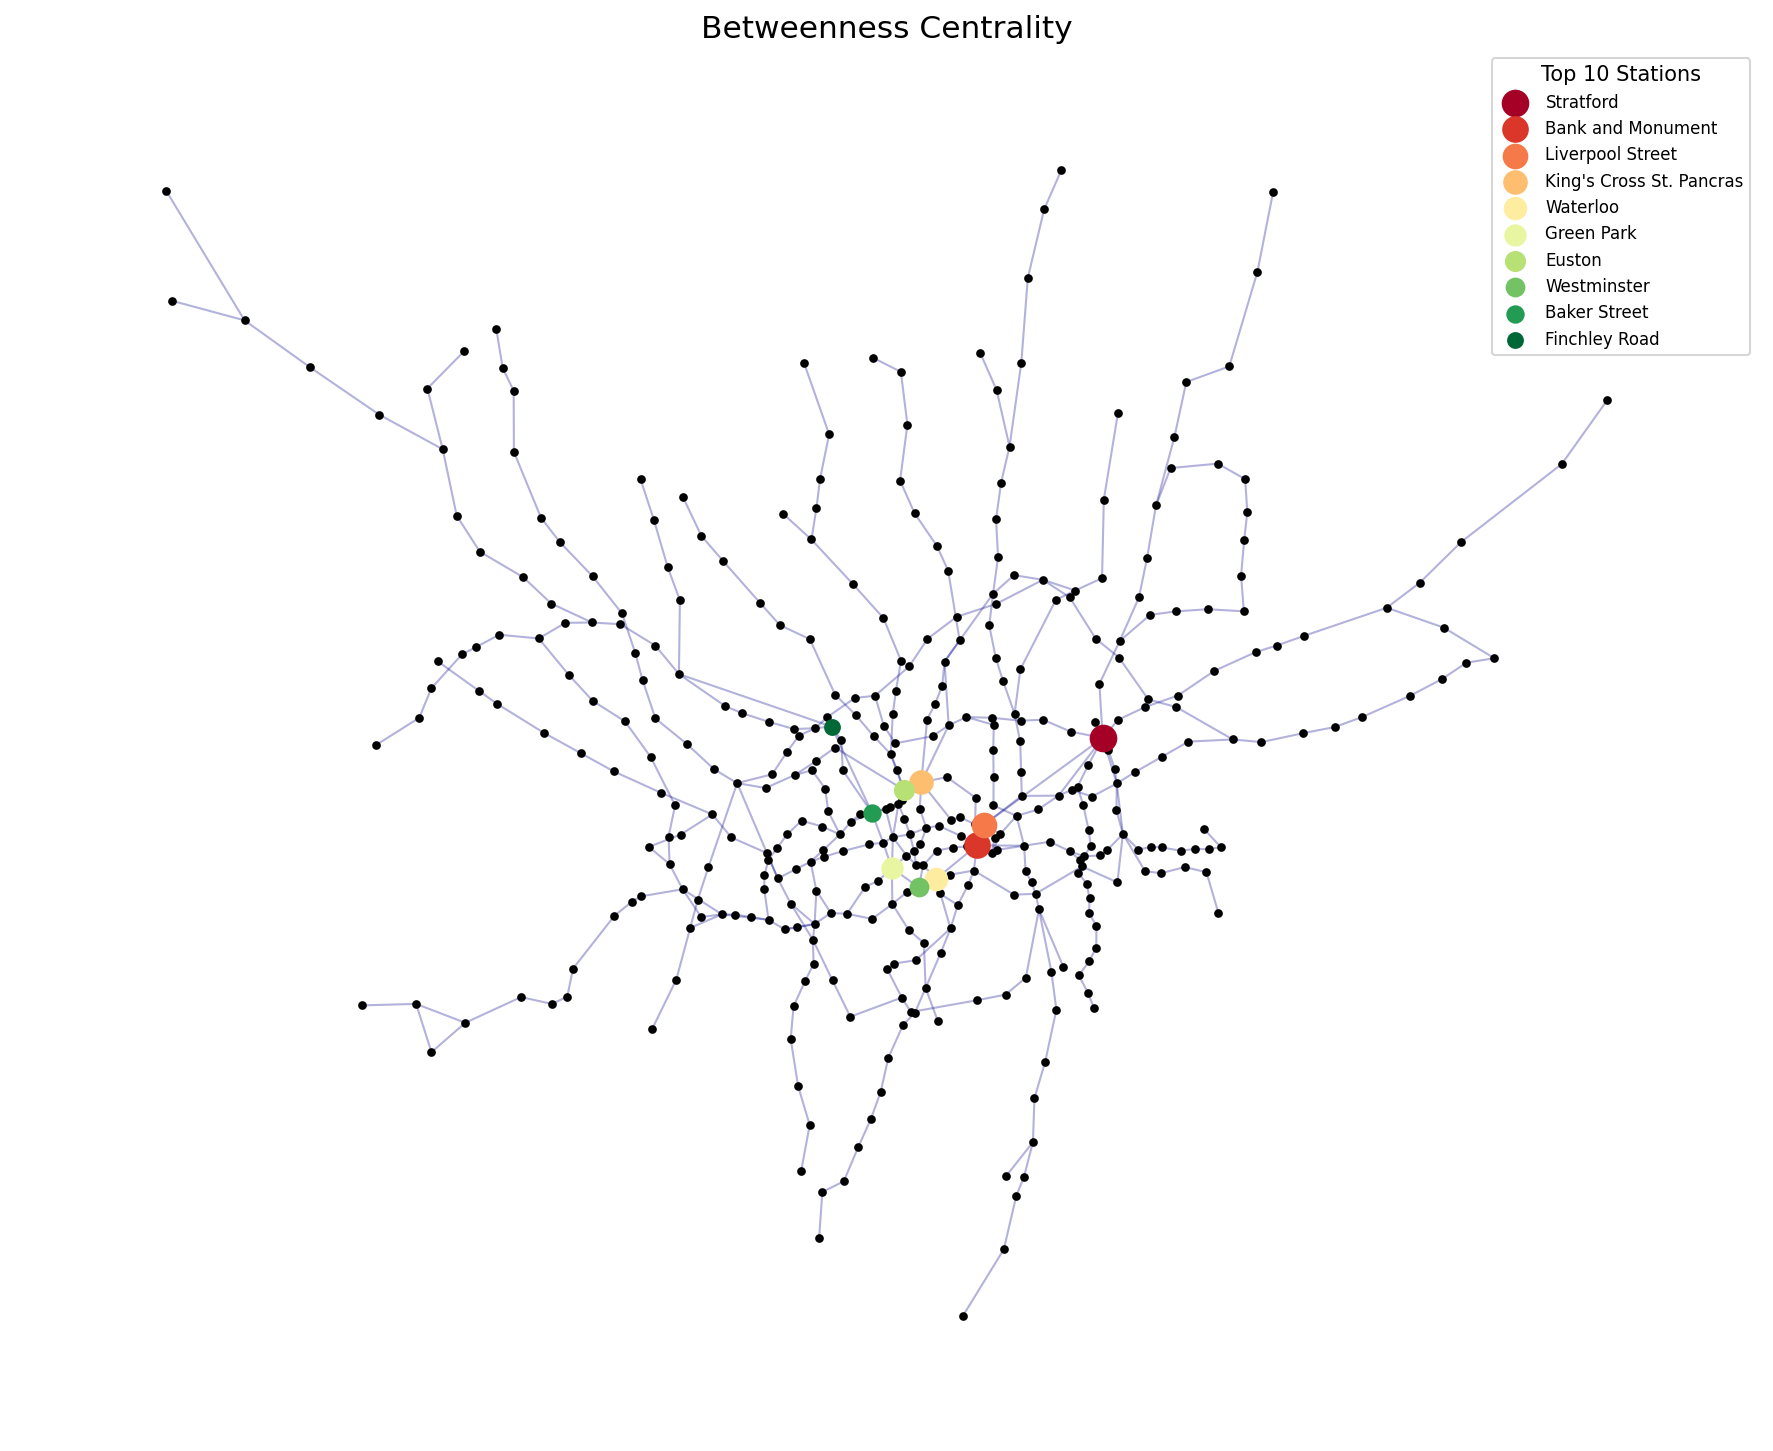

In [6]:
# 设置颜色映射和大小映射
colors = np.linspace(0, 1, 10)  # 为前10个节点创建一个从0到1的颜色映射
size_map = np.linspace(150, 50, 10)  # 为前10个节点创建一个从大到小的大小映射
color_map = [mcolors.to_hex(plt.cm.RdYlGn(color)) for color in colors]  # 使用红绿色彩映射

# 创建图形
fig, ax = plt.subplots(figsize=(15, 12), dpi=150)

# 绘制伦敦地铁网络作为背景
nx.draw_networkx_edges(G, pos, edge_color='darkblue', alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='black', alpha=1)  # 将其他车站设为淡绿色

# 绘制前10个中心性最高的站点
top_10_stations = bet_cen_df.head(10)['station']
for i, station in enumerate(top_10_stations):
    x, y = G.nodes[station]['x'], G.nodes[station]['y']
    # 绘制每个站点，并为每个站点设置一个图例项
    ax.scatter(x, y, color=color_map[i], s=size_map[i], label=station, zorder=3)

# 添加图例和标题
plt.title('Betweenness Centrality', fontsize=15)
# 使用图例来显示每个站点的名称和颜色
plt.legend(loc='upper right', title='Top 10 Stations', fontsize=8, markerscale=1)
plt.axis('off')
plt.show()

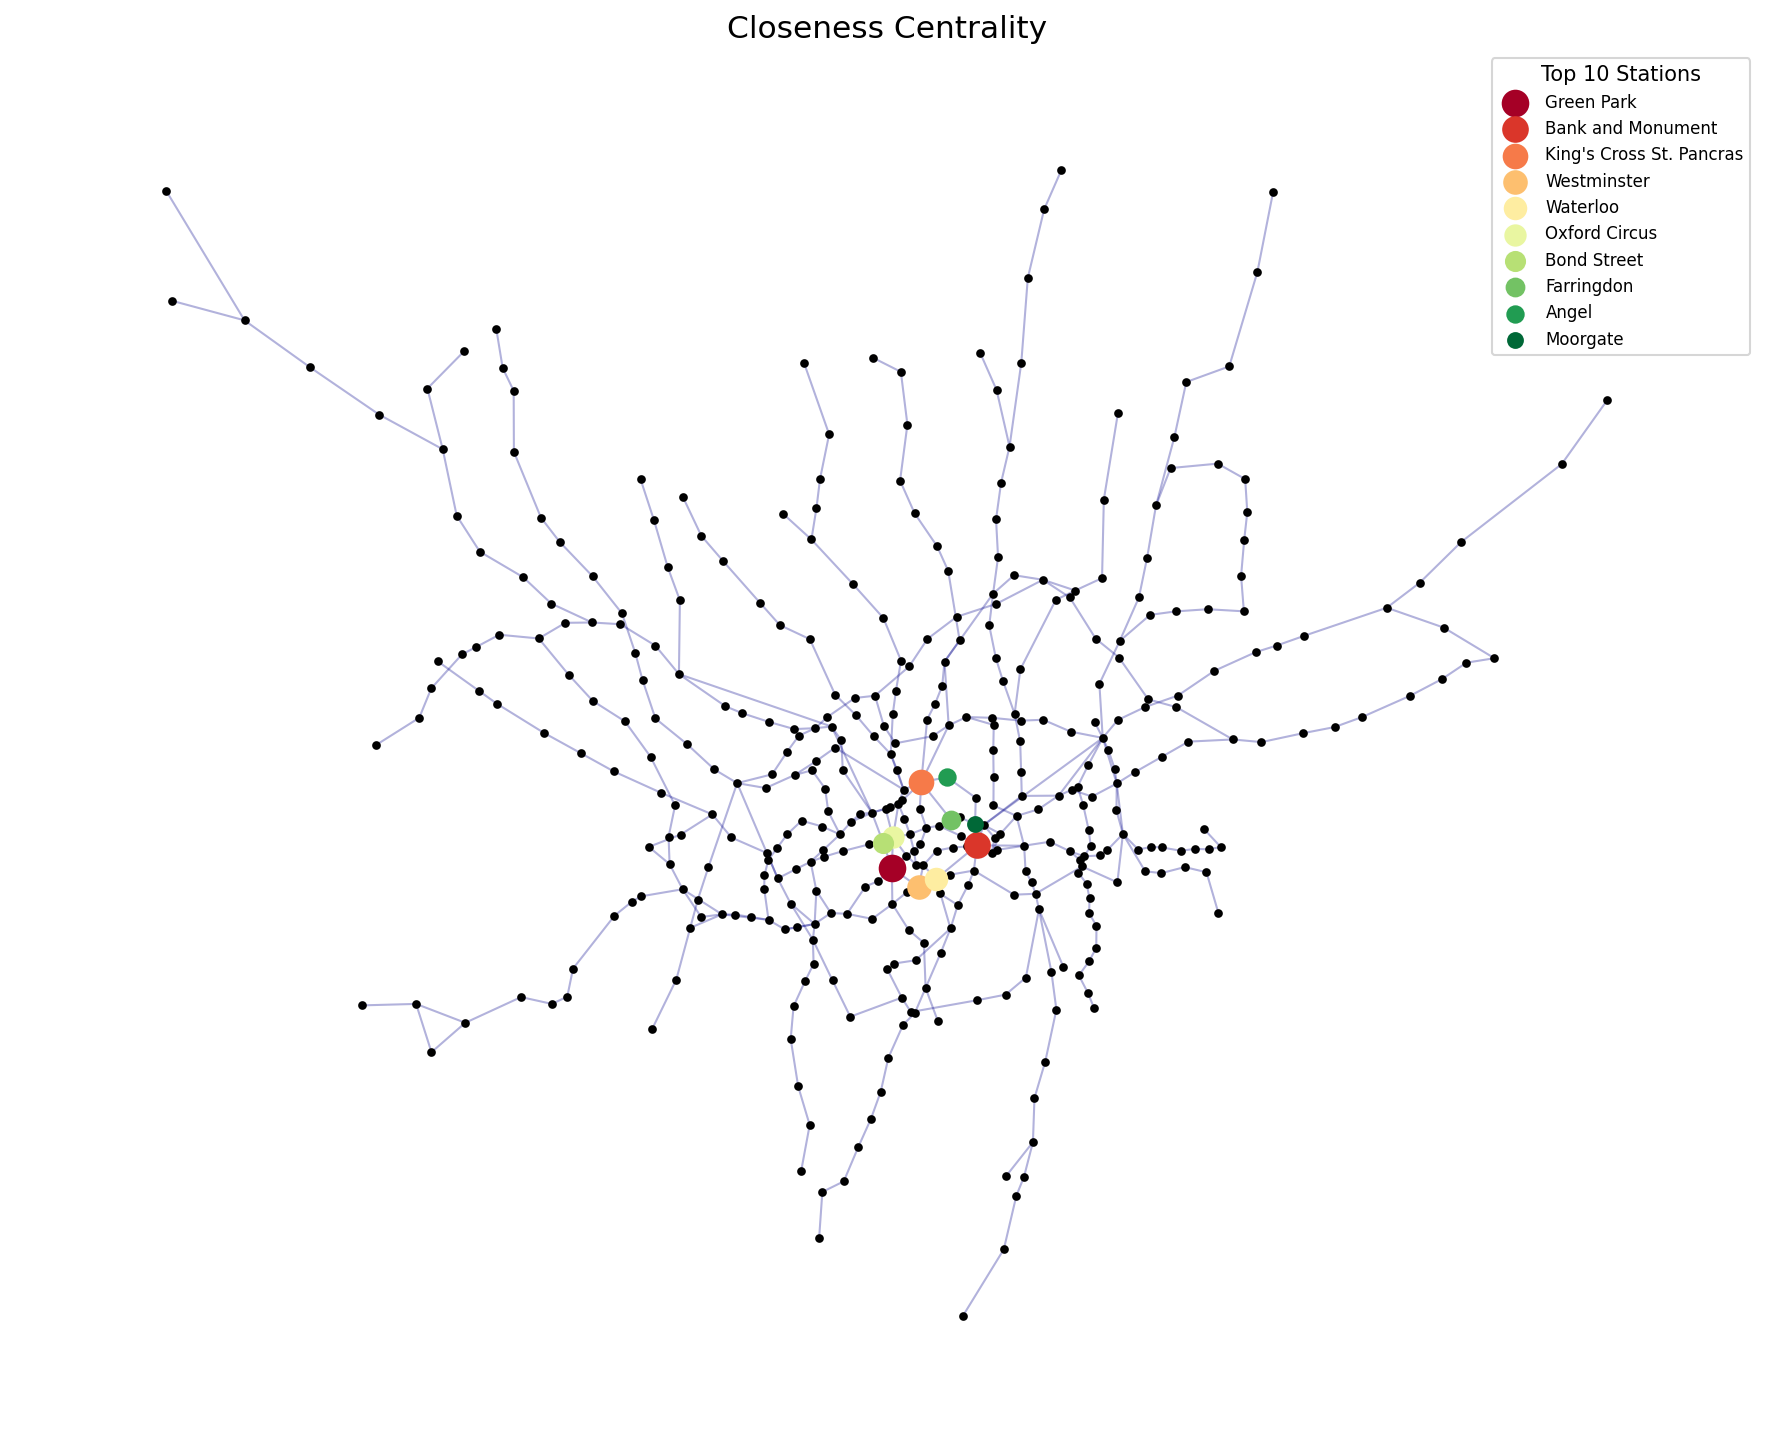

In [7]:
# 设置颜色映射和大小映射
colors = np.linspace(0, 1, 10)  # 为前10个节点创建一个从0到1的颜色映射
size_map = np.linspace(150, 50, 10)  # 为前10个节点创建一个从大到小的大小映射
color_map = [mcolors.to_hex(plt.cm.RdYlGn(color)) for color in colors]  # 使用红绿色彩映射

# 创建图形
fig, ax = plt.subplots(figsize=(15, 12), dpi=150)

# 绘制伦敦地铁网络作为背景
nx.draw_networkx_edges(G, pos, edge_color='darkblue', alpha=0.3)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='black', alpha=1)  # 将其他车站设为淡绿色

# 绘制前10个中心性最高的站点
top_10_stations = clo_cen_df.head(10)['station']

for i, station in enumerate(top_10_stations):
    x, y = G.nodes[station]['x'], G.nodes[station]['y']
    # 绘制每个站点，并为每个站点设置一个图例项
    ax.scatter(x, y, color=color_map[i], s=size_map[i], label=station, zorder=3)

# 添加图例和标题
plt.title('Closeness Centrality', fontsize=15)
# 使用图例来显示每个站点的名称和颜色
plt.legend(loc='upper right', title='Top 10 Stations', fontsize=8, markerscale=1)
plt.axis('off')
plt.show()

In [8]:
# Create a function to compute the number of connected components in the network after node removal
#def count_connected_components(G):
#    G_copy = copy.deepcopy(G)
#    return len(list(nx.connected_components(G_copy)))


# Create a function to compute the size of the largest connected component in the network after node removal
def size_largest_component(G):
    G_copy = copy.deepcopy(G)
    components = list(nx.connected_components(G_copy))
    largest_component = max(components, key=len)
    return len(largest_component)

#
def global_efficiency(G):
    G_copy = copy.deepcopy(G)
    return nx.global_efficiency(G_copy)


In [9]:
def nonseq_removal(G, centrality_measure, num_nodes):
    G_removal = copy.deepcopy(G)
    # Compute centrality measure for all nodes in the network
    node_centrality = centrality_measure(G_removal)

    # Create a DataFrame with nodes and their centrality scores
    nodes_df = pd.DataFrame(list(node_centrality.items()), columns=['node', 'centrality'])

    # Sort nodes by their centrality score
    nodes_sorted = nodes_df.sort_values(by='centrality', ascending=False)

    # Initialize lists to store the impact measures for each node removal
    global_efficiencies = []
    largest_component_sizes = []
    global_efficiencies.append(global_efficiency(G_removal))
    largest_component_sizes.append(size_largest_component(G_removal))

    # Remove nodes in order of decreasing centrality score and compute impact measures
    for i in range(min(num_nodes, len(nodes_sorted))):
        node = nodes_sorted.iloc[i]['node']
        G_removal.remove_node(node)
        global_efficiencies.append(global_efficiency(G_removal))
        largest_component_sizes.append(size_largest_component(G_removal))

    return global_efficiencies, largest_component_sizes, num_nodes



def seq_removal(G, centrality_measure, num_nodes):
    G_removal = copy.deepcopy(G)
    # Initialize lists to store the impact measures for each node removal
    global_efficiencies = []
    largest_component_sizes = []
    global_efficiencies.append(global_efficiency(G_removal))
    largest_component_sizes.append(size_largest_component(G_removal))
    # Continue removing nodes until 10 nodes have been removed
    for i in range(min(num_nodes, len(G_removal.nodes))):
        # Compute centrality measure for all nodes in the network
        node_centrality = centrality_measure(G_removal)

        # Create a DataFrame with nodes and their centrality scores
        nodes_df = pd.DataFrame(list(node_centrality.items()), columns=['node', 'centrality'])

        # Sort nodes by their centrality score
        nodes_sorted = nodes_df.sort_values(by='centrality', ascending=False)

        # Remove the highest ranked node and compute impact measures
        node = nodes_sorted.iloc[0]['node']
        G_removal.remove_node(node)
        global_efficiencies.append(global_efficiency(G_removal))
        largest_component_sizes.append(size_largest_component(G_removal))

    return global_efficiencies, largest_component_sizes, num_nodes


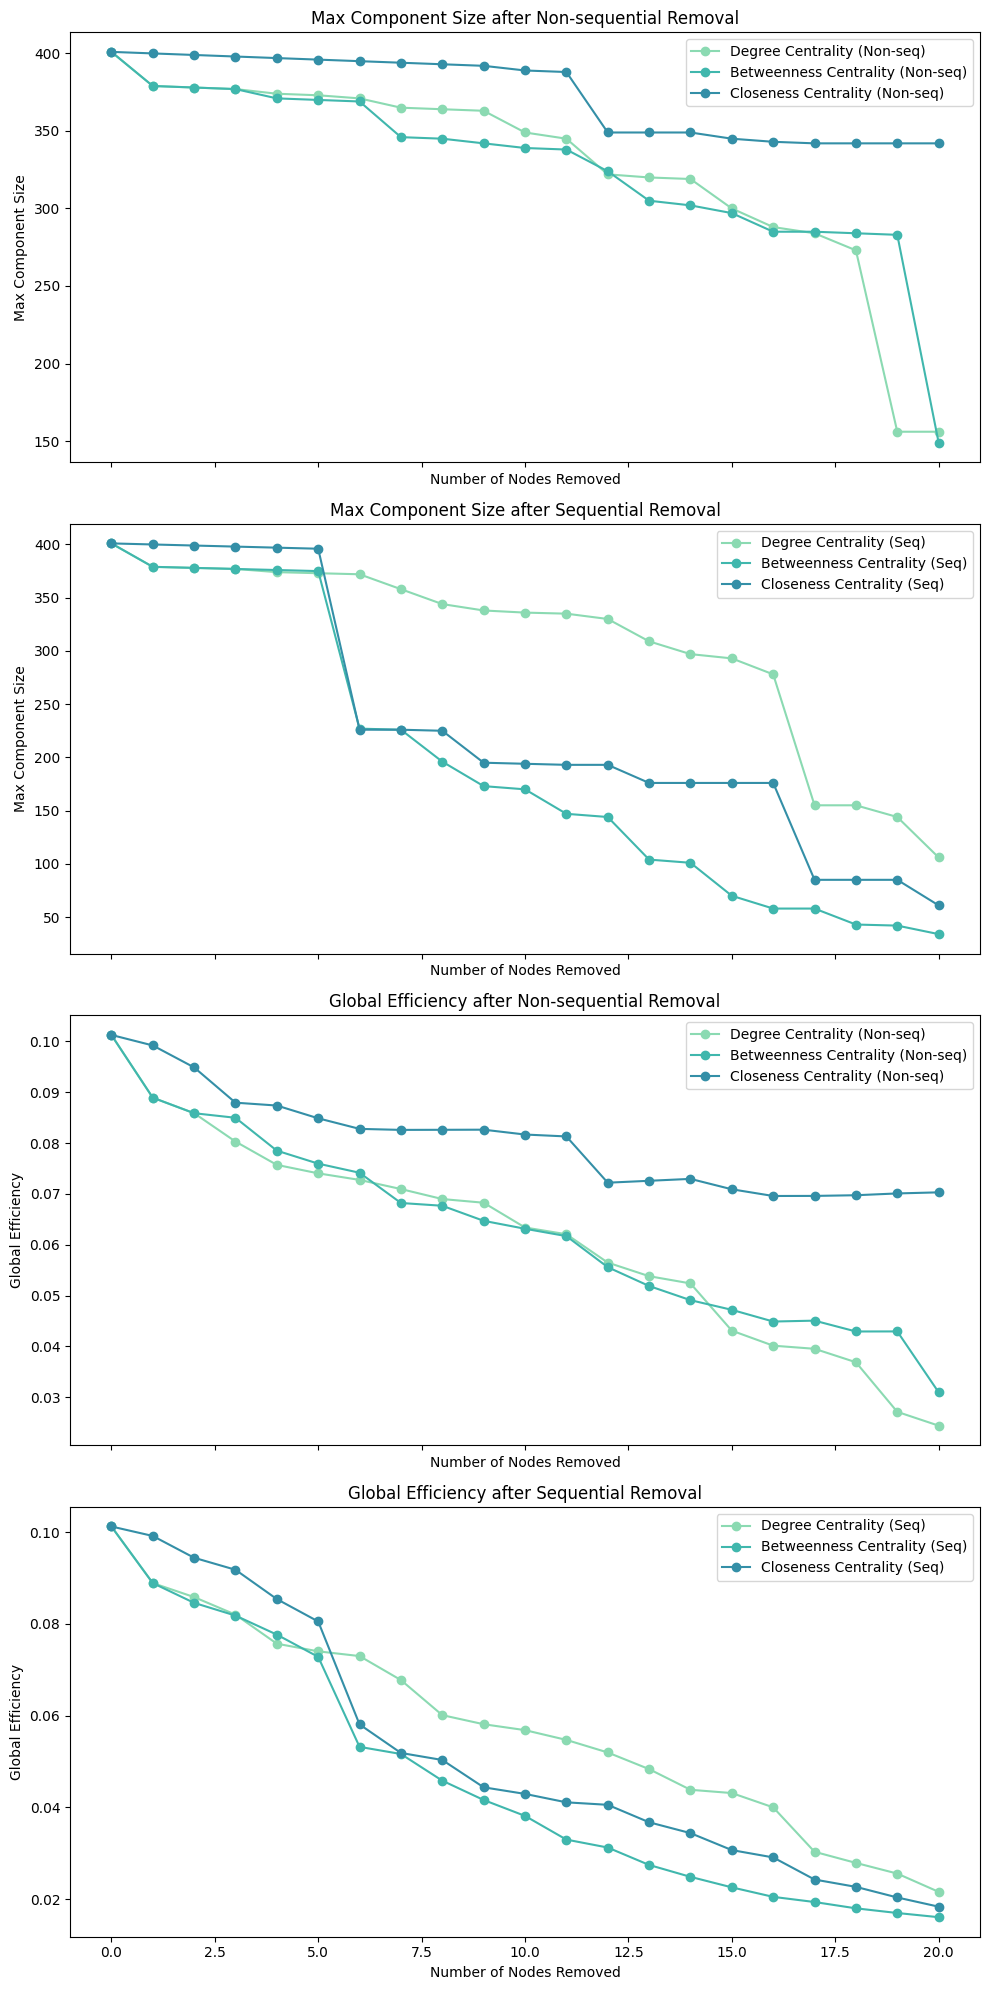

In [10]:
# Define the centrality measures to use
centrality_measures = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality]

# Initialize lists to store results for each centrality measure
ns_global_efficiencies = []
ns_largest_component_sizes = []
seq_global_efficiencies = []
seq_largest_component_sizes = []

# Perform node removal for each centrality measure using both non-sequential and sequential strategies
for centrality_measure in centrality_measures:
    # Perform non-sequential removal
    ns_efficiencies, ns_sizes, _ = nonseq_removal(G, centrality_measure, 20)
    ns_global_efficiencies.append(ns_efficiencies)
    ns_largest_component_sizes.append(ns_sizes)

    # Perform sequential removal
    seq_efficiencies, seq_sizes, _ = seq_removal(G, centrality_measure, 20)
    seq_global_efficiencies.append(seq_efficiencies)
    seq_largest_component_sizes.append(seq_sizes)

# 设置 seaborn 风格和色板
#sns.set(style="whitegrid")
sns.set_palette("mako_r")

# 中心性度量定义
centrality_measures = {
    'Degree Centrality': nx.degree_centrality,
    'Betweenness Centrality': nx.betweenness_centrality,
    'Closeness Centrality': nx.closeness_centrality
}

# 准备绘图
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# 对每种中心性度量进行节点删除实验
for name, measure in centrality_measures.items():
    # 无序删除
    ns_efficiencies, ns_sizes, _ = nonseq_removal(G, measure, 20)
    # 有序删除
    seq_efficiencies, seq_sizes, _ = seq_removal(G, measure, 20)

    # 绘制无序删除后的最大连通子图大小
    axes[0].plot(range(0, 21), ns_sizes, marker='o', label=f'{name} (Non-seq)')
    # 绘制有序删除后的最大连通子图大小
    axes[1].plot(range(0, 21), seq_sizes, marker='o', label=f'{name} (Seq)')

    # 绘制无序删除后的全球效率
    axes[2].plot(range(0, 21), ns_efficiencies, marker='o', label=f'{name} (Non-seq)')
    # 绘制有序删除后的全球效率
    axes[3].plot(range(0, 21), seq_efficiencies, marker='o', label=f'{name} (Seq)')

# 设置图表标题和图例
axes[0].set_title('Max Component Size after Non-sequential Removal')
axes[1].set_title('Max Component Size after Sequential Removal')
axes[2].set_title('Global Efficiency after Non-sequential Removal')
axes[3].set_title('Global Efficiency after Sequential Removal')

# 设置y轴和x轴标签
for i, ax in enumerate(axes):
    ax.set_xlabel('Number of Nodes Removed')
    if i < 2:
        ax.set_ylabel('Max Component Size')
    else:
        ax.set_ylabel('Global Efficiency')
    ax.legend()

# 调整子图间距和显示
plt.tight_layout()
plt.show()


In [11]:
def calculate_weighted_global_efficiency(G, weight='scaled_weight'):
    n = len(G)
    total_efficiency = 0.0
    
    # Iterate over all pairs of nodes
    for node in G:
        # Get weighted shortest path lengths from this node to all other nodes
        path_lengths = nx.single_source_dijkstra_path_length(G, node, weight=weight)
        # Sum the inverse of the path lengths for all other nodes
        total_efficiency += sum(1 / length if length != 0 else 0 for target, length in path_lengths.items() if target != node)
    
    # Normalize by the total number of pairs to get the global efficiency
    if n > 1:
        global_efficiency = total_efficiency / (n * (n - 1))
    else:
        global_efficiency = 0
    
    return global_efficiency


# 定义计算整个网络平均客流强度的函数
def calculate_average_flow_strength(G):
    total_flow_strength = 0
    # 遍历每个节点，计算客流强度并累加
    for node in G.nodes():
        # 使用 delta_ij 确保只计算存在流量的节点对
        node_strength = sum(G[u][v]['flows'] for u, v in G.edges(node))
        total_flow_strength += node_strength
    # 由于每条边在无向图中被计算了两次，所以需要除以2
    average_flow_strength = total_flow_strength / (2 * len(G.nodes()))
    return average_flow_strength

In [29]:
import networkx as nx
import pandas as pd
import copy

# 读取图形文件
G_invflow_weighted = nx.read_graphml('london.graph')

# Extract 'x' and 'y' values from 'coords' attribute
for node in G_invflow_weighted.nodes():
    coords = G_invflow_weighted.nodes[node]['coords'].split(',')
    G_invflow_weighted.nodes[node]['x'] = float(coords[0].strip("()"))
    G_invflow_weighted.nodes[node]['y'] = float(coords[1].strip("()"))
pos = {node: (G_invflow_weighted.nodes[node]['x'], G_invflow_weighted.nodes[node]['y']) for node in G_invflow_weighted.nodes()}
# 为了使用流量属性作为权重，先对流量属性取倒数，并加上一个小常数以避免除以零的情况
epsilon = 1e-6
for u, v, d in G_invflow_weighted.edges(data=True):
    d['inv_flows'] = 1 / (d['flows'] + epsilon)

# 对权重进行缩放，以确保最小权重为1
min_weight = min(d['inv_flows'] for _, _, d in G_invflow_weighted.edges(data=True))
scale = 1 / min_weight if min_weight > 0 else 1
for u, v, d in G_invflow_weighted.edges(data=True):
    d['scaled_weight'] = d['inv_flows'] * scale

# 创建图的副本进行修改
G_modified1 = copy.deepcopy(G_invflow_weighted)
G_modified2 = copy.deepcopy(G_invflow_weighted)

# 使用 scaled_weight 作为权重计算加权的介数中心性
betweenness_centrality_weighted = nx.betweenness_centrality(G_invflow_weighted, weight='scaled_weight')

# 根据介数中心性的值排序节点
betweenness_ranked_weighted = sorted(betweenness_centrality_weighted.items(), key=lambda x: x[1], reverse=True)[:100]
betweenness_ranked_weighted = pd.DataFrame(betweenness_ranked_weighted, columns=['station', 'betweenness_centrality'])
top_three_nodes1 = betweenness_ranked_weighted.head(100)['station'].tolist()
top_three_nodes2 = bet_cen_df.head(100)['station'].tolist()
# 删除介数中心性前三位的节点
G_modified1.remove_nodes_from(top_three_nodes1)
G_modified2.remove_nodes_from(top_three_nodes2)



# 输出删除节点后的全局效率
network_efficiency_before=nx.global_efficiency(G_invflow_weighted)
network_efficiency_after=nx.global_efficiency(G_modified2)
network_weighted_efficiency_before = calculate_weighted_global_efficiency(G_invflow_weighted)
network_weighted_efficiency_after = calculate_weighted_global_efficiency(G_modified2)
print("Before Damaged Network Global Efficiency:", network_efficiency_before)
print("After Damaged Network Global Efficiency:", network_efficiency_after)
print("Before Damaged Network Global Weighted Efficiency:", network_weighted_efficiency_before)
print("After Damaged Network Global Weighted Efficiency:", network_weighted_efficiency_after)

network_efficiency_before=nx.global_efficiency(G_invflow_weighted)
network_efficiency_after=nx.global_efficiency(G_modified1)
network_weighted_efficiency_before = calculate_weighted_global_efficiency(G_invflow_weighted)
network_weighted_efficiency_after = calculate_weighted_global_efficiency(G_modified1)
print("Before Damaged Network Global Efficiency:", network_efficiency_before)
print("After Damaged Network Global Efficiency:", network_efficiency_after)
print("Before Damaged Network Global Weighted Efficiency:", network_weighted_efficiency_before)
print("After Damaged Network Global Weighted Efficiency:", network_weighted_efficiency_after)


Before Damaged Network Global Efficiency: 0.1012561935972123
After Damaged Network Global Efficiency: 0.011841041078816665
Before Damaged Network Global Weighted Efficiency: 0.012067121744486651
After Damaged Network Global Weighted Efficiency: 0.0005117859298184238
Before Damaged Network Global Efficiency: 0.1012561935972123
After Damaged Network Global Efficiency: 0.012746757578386971
Before Damaged Network Global Weighted Efficiency: 0.012067121744486651
After Damaged Network Global Weighted Efficiency: 0.0005071951784179498


In [13]:
top_10_nodes = betweenness_ranked_weighted.head(10)['station'].tolist()
top_10_nodes

['Green Park',
 'Bank and Monument',
 'Waterloo',
 'Westminster',
 'Liverpool Street',
 'Stratford',
 'Bond Street',
 'Euston',
 'Oxford Circus',
 'Warren Street']

In [14]:
# 读取图形文件
G_flow_weighted = nx.read_graphml('london.graph')

# Extract 'x' and 'y' values from 'coords' attribute
for node in G_flow_weighted.nodes():
    coords = G_flow_weighted.nodes[node]['coords'].split(',')
    G_flow_weighted.nodes[node]['x'] = float(coords[0].strip("()"))
    G_flow_weighted.nodes[node]['y'] = float(coords[1].strip("()"))
pos = {node: (G_flow_weighted.nodes[node]['x'], G_flow_weighted.nodes[node]['y']) for node in G_flow_weighted.nodes()}

for u, v, d in G_flow_weighted.edges(data=True):
    d['weight'] = d['flows']

G_modified3 = copy.deepcopy(G_flow_weighted)
G_modified4 = copy.deepcopy(G_flow_weighted)

# 删除介数中心性前三位的节点
G_modified3.remove_nodes_from(top_three_nodes2)
G_modified4.remove_nodes_from(top_three_nodes1)

# 使用上述函数计算整个网络的平均客流强度
average_flow_strength = calculate_average_flow_strength(G_flow_weighted)
average_flow_strength1 = calculate_average_flow_strength(G_modified3)
average_flow_strength2 = calculate_average_flow_strength(G_modified4)
print('Average flow strength of the network:', average_flow_strength)
print('After Damage1, Average flow strength of the network:', average_flow_strength1)
print('After Damage2, Average flow strength of the network:', average_flow_strength2)

Average flow strength of the network: 24765.204488778054
After Damage1, Average flow strength of the network: 22245.595477386934
After Damage2, Average flow strength of the network: 20883.856783919597


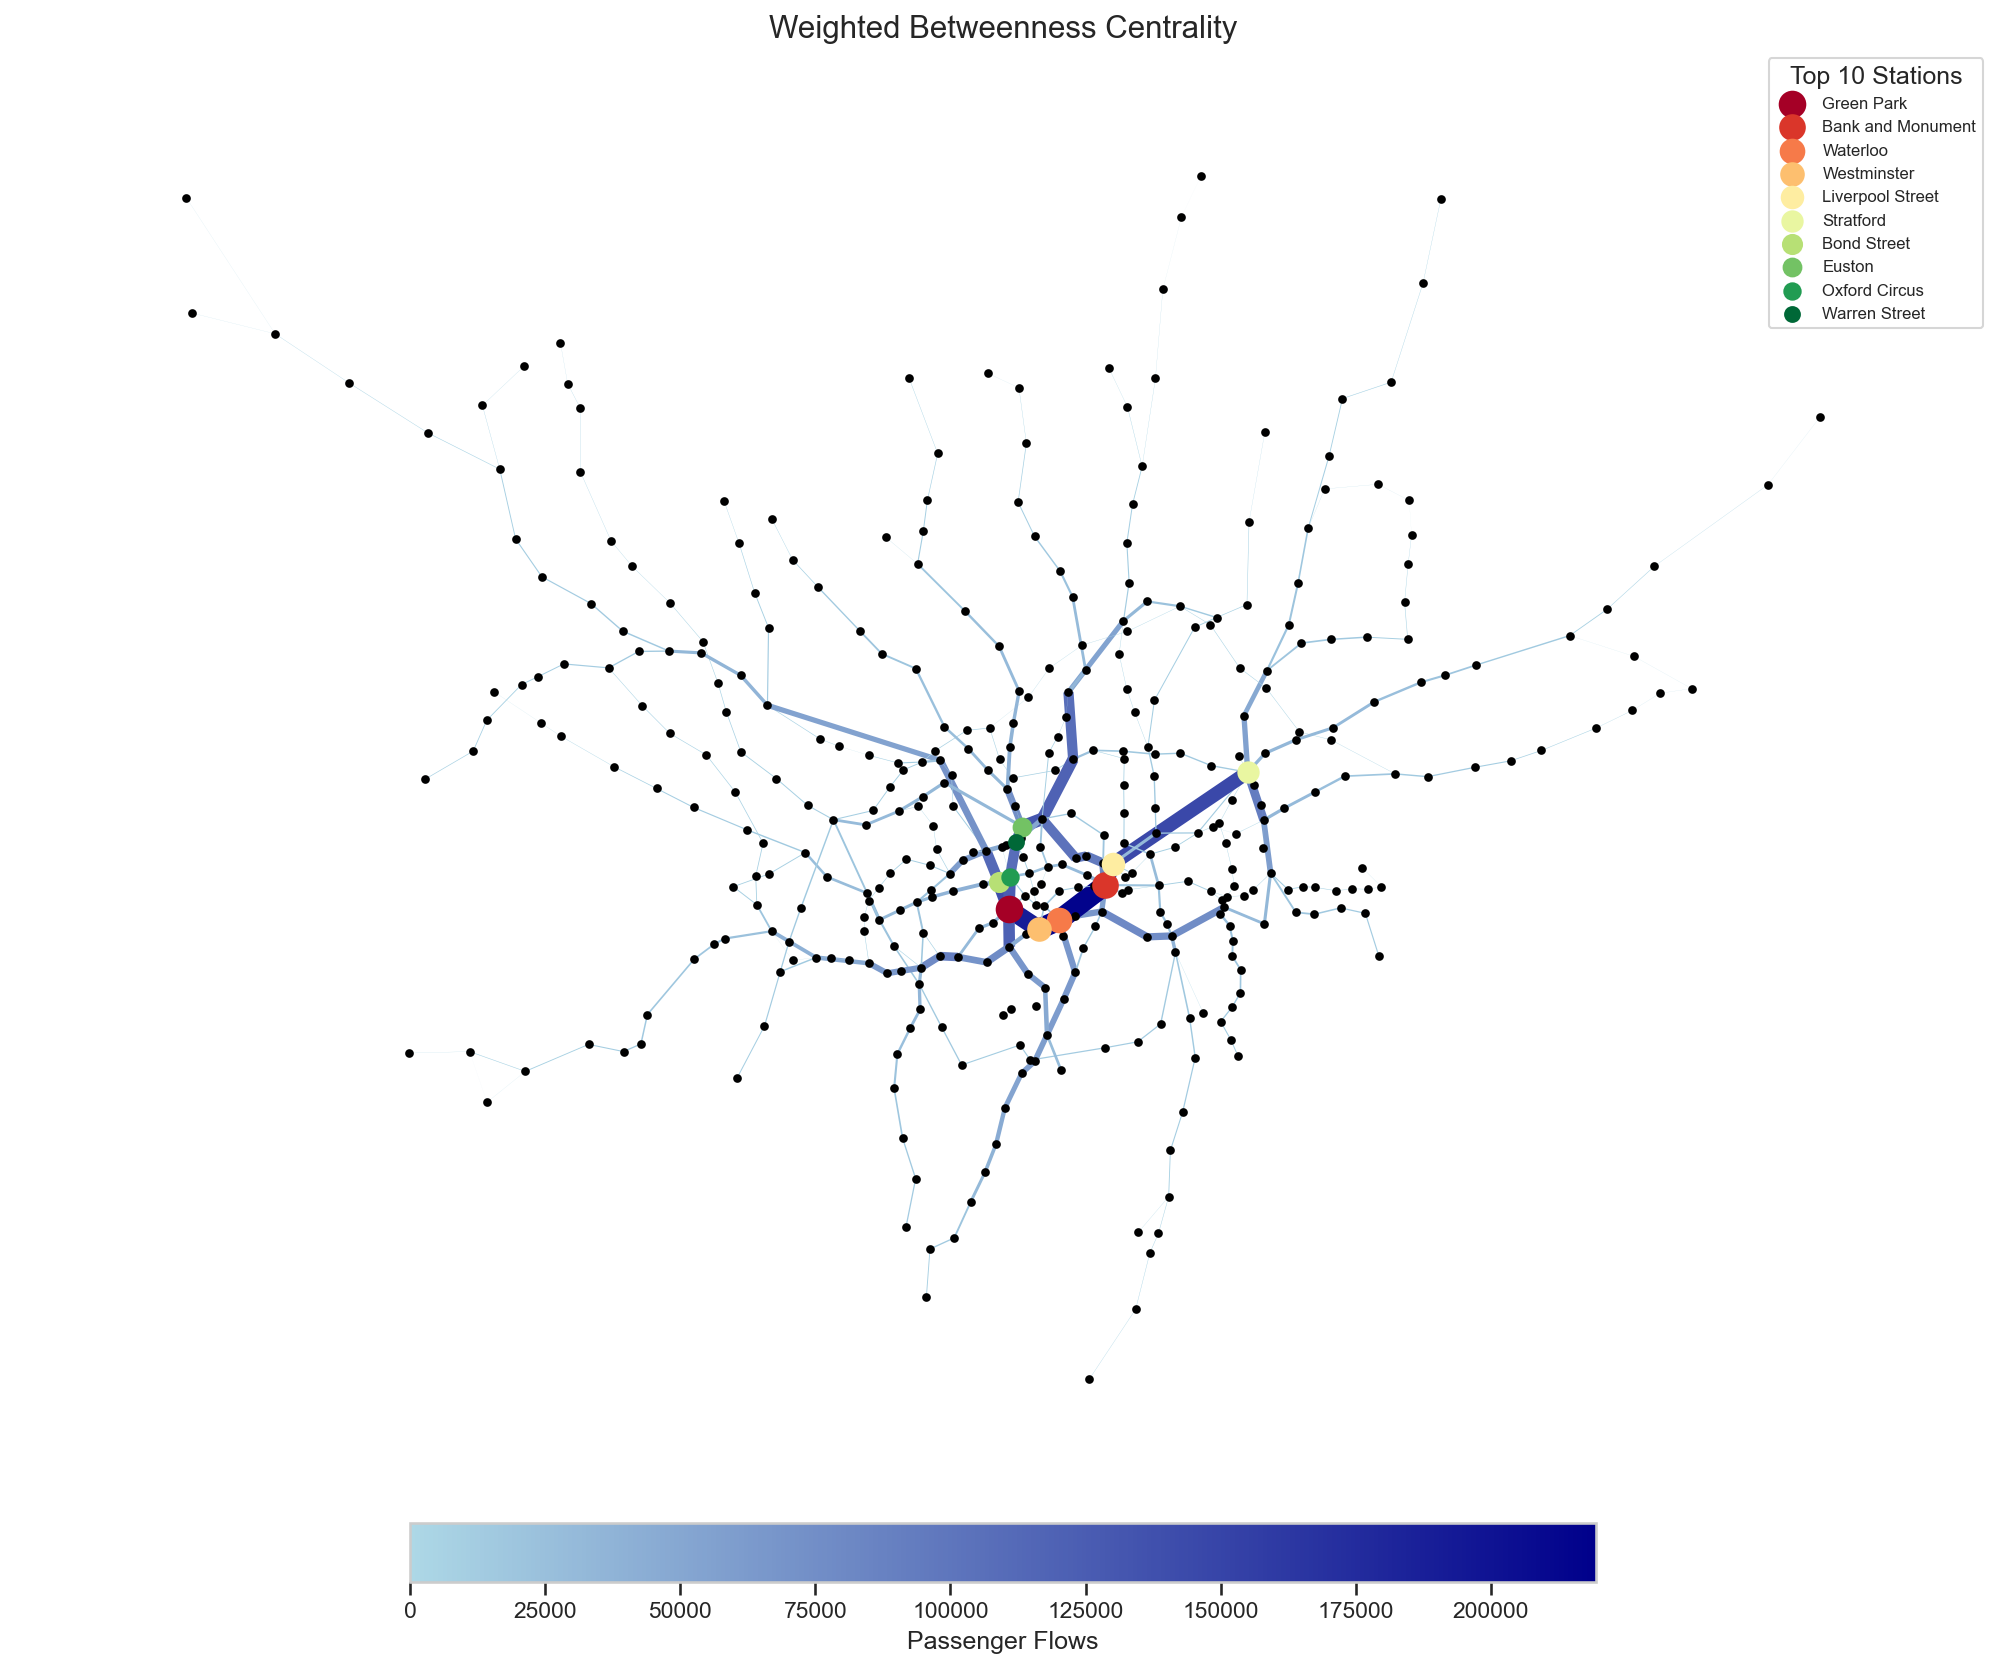

In [30]:
# 创建图形
fig, ax = plt.subplots(figsize=(17, 15), dpi=150)

# 创建从红色到绿色的色彩映射
cmap = LinearSegmentedColormap.from_list("color", ["lightblue", "darkblue"])

# 获取流量值，并计算颜色和宽度
flows_values = [data['flows'] for _, _, data in G.edges(data=True)]
flow_color = [cmap(flow / max(flows_values)) for flow in flows_values]
flow_width = [(flow / max(flows_values) * 10) for flow in flows_values]

# 绘制网络边和节点
nx.draw_networkx_edges(G, pos, ax=ax, edge_color=flow_color, width=flow_width)
nx.draw_networkx_nodes(G, pos, ax=ax, node_color='black', node_size=10)

# 创建用于颜色条的ScalarMappable对象
norm = plt.Normalize(min(flows_values), max(flows_values))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # 这个调用是必需的，尽管不会直接使用它
plt.colorbar(sm, ax=ax, label="Passenger Flows", orientation="horizontal", shrink=0.6, pad=0.01)

# 设置颜色映射和大小映射，为前10个节点
colors = np.linspace(0, 1, 10)  # 创建颜色映射
size_map = np.linspace(150, 50, 10)  # 创建大小映射
color_map = [mcolors.to_hex(plt.cm.RdYlGn(color)) for color in colors]

# 绘制前10个加权中心性最高的站点
top_10_stations = betweenness_ranked_weighted.head(10)['station']
for i, station in enumerate(top_10_stations):
    x, y = G.nodes[station]['x'], G.nodes[station]['y']
    ax.scatter(x, y, color=color_map[i], s=size_map[i], label=station, zorder=3)

# 添加图例和标题
plt.title('Weighted Betweenness Centrality', fontsize=15)
plt.legend(loc='upper right', title='Top 10 Stations', fontsize=8, markerscale=1)
plt.axis('off')
plt.show()


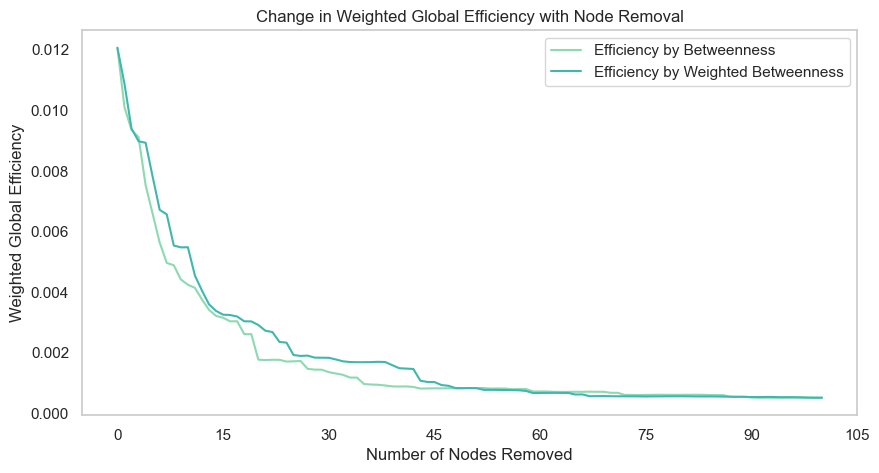

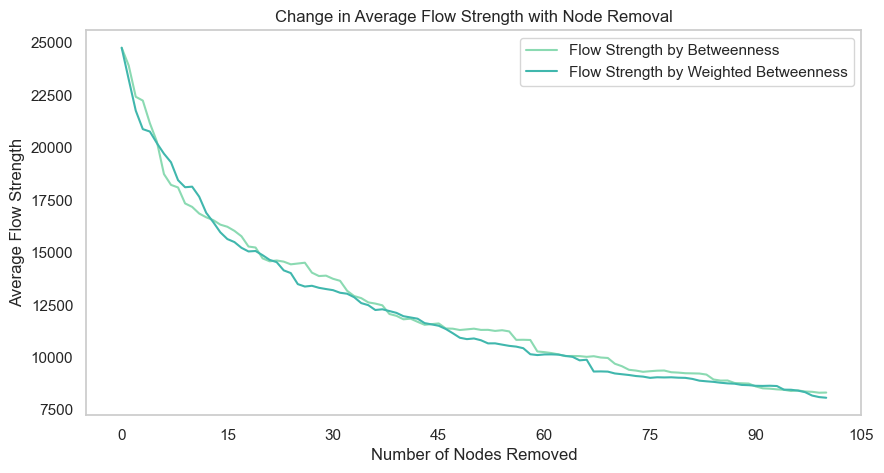

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib.ticker as ticker


# 设置 Seaborn 颜色风格
sns.set(style="whitegrid", palette="mako_r")

# 计算未移除节点时的全局效率和客流强度
initial_efficiency = calculate_weighted_global_efficiency(G_invflow_weighted)
initial_flow_strength = calculate_average_flow_strength(G_flow_weighted)

# 计算移除节点后的全局效率
def compute_efficiencies_after_removal(G, nodes_to_remove):
    """ 移除指定的节点列表，并计算全局效率 """
    G_temp = copy.deepcopy(G)
    efficiencies = [initial_efficiency]  # 包含初始效率
    for node in nodes_to_remove:
        G_temp.remove_node(node)  # 移除节点
        eff = calculate_weighted_global_efficiency(G_temp)  # 计算加权全局效率
        efficiencies.append(eff)
    return efficiencies

# 计算移除节点后的客流强度
def compute_strengths_after_removal(G, nodes_to_remove):
    """ 移除指定的节点列表，并计算客流强度 """
    G_temp = copy.deepcopy(G)
    flow_strengths = [initial_flow_strength]  # 包含初始客流强度
    for node in nodes_to_remove:
        G_temp.remove_node(node)  # 移除节点
        fs = calculate_average_flow_strength(G_temp)  # 计算平均客流强度
        flow_strengths.append(fs)
    return flow_strengths

# 执行计算
efficiencies_betweenness = compute_efficiencies_after_removal(G_invflow_weighted, top_three_nodes2)
flows_betweenness = compute_strengths_after_removal(G_flow_weighted, top_three_nodes2)

efficiencies_weighted_betweenness = compute_efficiencies_after_removal(G_invflow_weighted, top_three_nodes1)
flows_weighted_betweenness = compute_strengths_after_removal(G_flow_weighted, top_three_nodes1)

# 绘制加权全局效率图表
plt.figure(figsize=(10, 5))
plt.plot(efficiencies_betweenness, label='Efficiency by Betweenness', marker=None, linestyle='-')
plt.plot(efficiencies_weighted_betweenness, label='Efficiency by Weighted Betweenness', marker=None, linestyle='-')
plt.title('Change in Weighted Global Efficiency with Node Removal')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Weighted Global Efficiency')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # 设置x轴只显示整数
plt.legend()
plt.grid(False)
plt.show()

# 绘制平均客流强度图表
plt.figure(figsize=(10, 5))
plt.plot( flows_betweenness, label='Flow Strength by Betweenness', marker=None, linestyle='-')
plt.plot( flows_weighted_betweenness, label='Flow Strength by Weighted Betweenness', marker=None, linestyle='-')
plt.title('Change in Average Flow Strength with Node Removal')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Average Flow Strength')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # 设置x轴只显示整数
plt.legend()
plt.grid(False)
plt.show()
